<a href="https://colab.research.google.com/github/orlandokohjy/Etiqa-Data_Scientist/blob/main/3_Model_Building_(Facebook_Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Building - using Facebook Prophet library
- ARIMA does not seem to fit well previously
- trying Facebook Prophey library here

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('/content/drive/Othercomputers/My MacBook Pro/KJY/Data Science/Data_Scientist_Position_at_Etiqa_Insurance_Singapore/0-df.pkl')

## Prophet Model

In [3]:
!pip install fbprophet

In [6]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

In [9]:
model = Prophet(weekly_seasonality=True)
df['ds'] = df.index
df['y'] = df['calls']
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = model.make_future_dataframe(periods=365)
future.tail()

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#fig1 = model.plot(forecast, figsize=(32, 16))

,ds,yhat,yhat_lower,yhat_upper
1515,2017-02-24,5609.866338,4220.833382,6979.968732
1516,2017-02-25,4331.446417,2985.573115,5713.356115
1517,2017-02-26,3405.662893,2007.801034,4845.097170
1518,2017-02-27,5942.342785,4552.167506,7280.349398
1519,2017-02-28,5865.791273,4479.927003,7313.450325


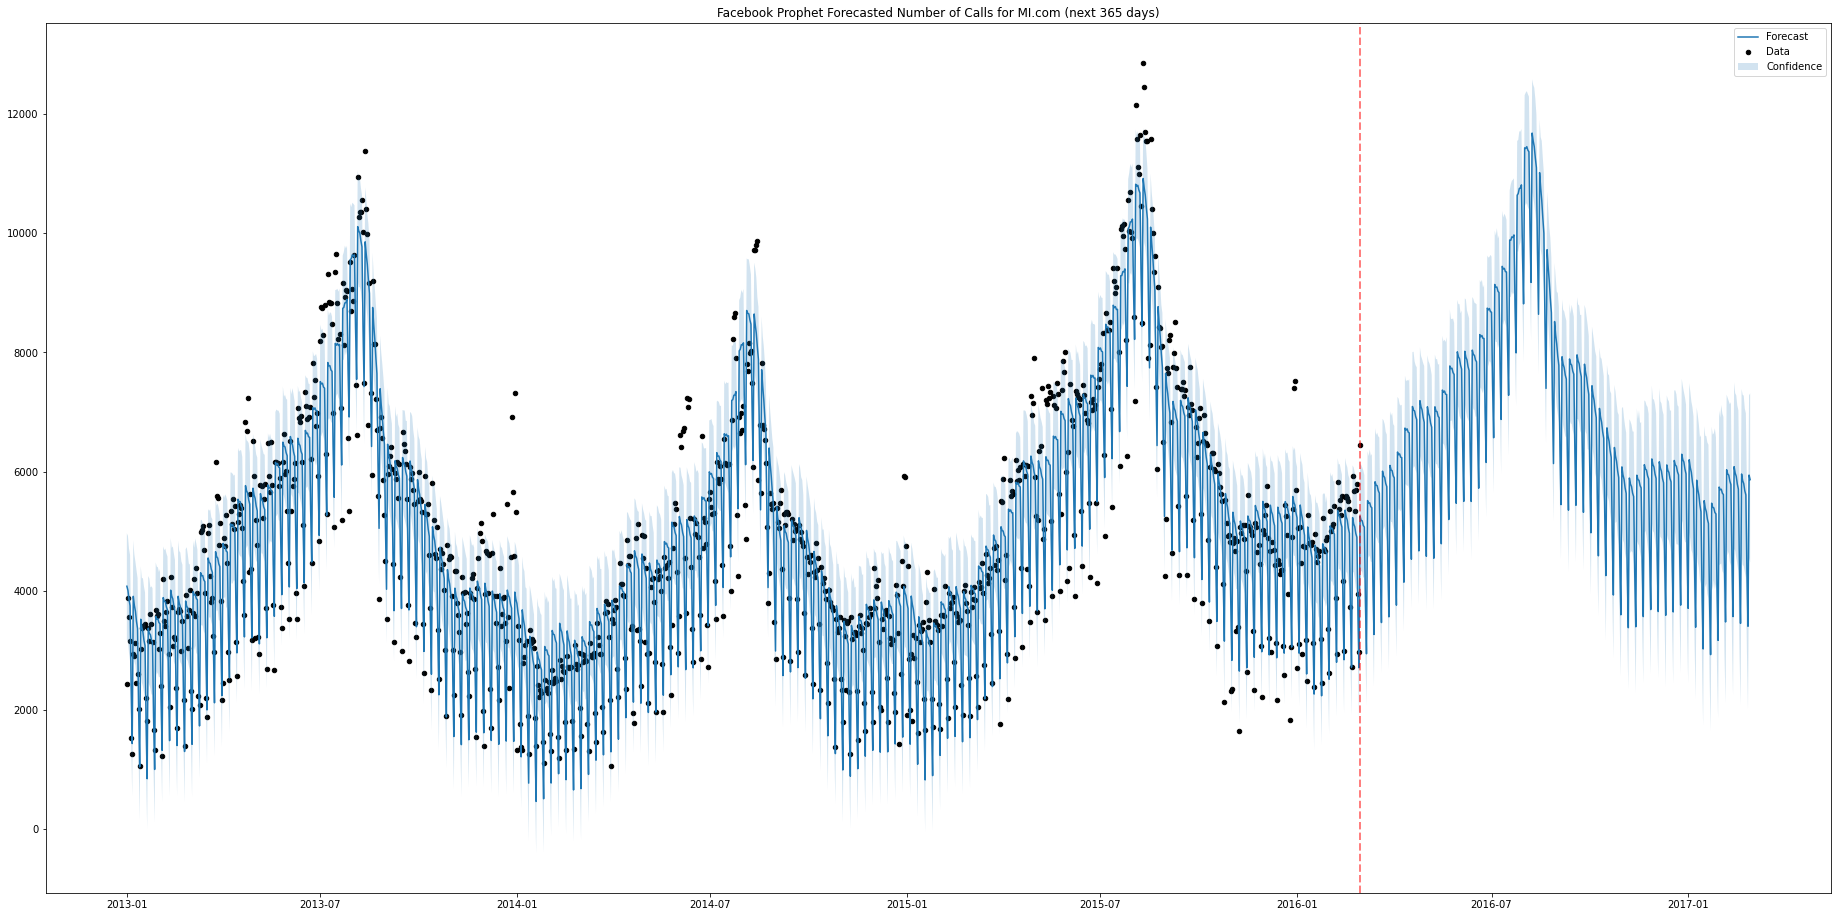

In [40]:
to_plot = forecast.merge(df, how='left')

fig, ax = plt.subplots(figsize=(32, 16))
ax.scatter(to_plot['ds'], to_plot['y'], label='Data', color='black', s=20)
ax.plot(to_plot['ds'], to_plot['yhat'], label='Forecast')
ax.axvline(x=forecast['ds'].max() - pd.Timedelta('365 days'), c='red', lw=2, alpha=0.5, \
           ls='--')
ax.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'], \
                alpha=0.2, label='Confidence')
ax.set_title('Facebook Prophet Forecasted Number of Calls for MI.com (next 365 days)')
ax.legend()

In [46]:
# listing all thge change points in the model
import plotly.graph_objects as go
deltas = model.params['delta'].mean(0)
cp = pd.DataFrame(model.changepoints)
cp['deltas'] = deltas
fig = go.Figure()

# create and style traces
fig.add_trace(go.Bar(x=cp['ds'], y=cp['deltas'], name='CPs'))

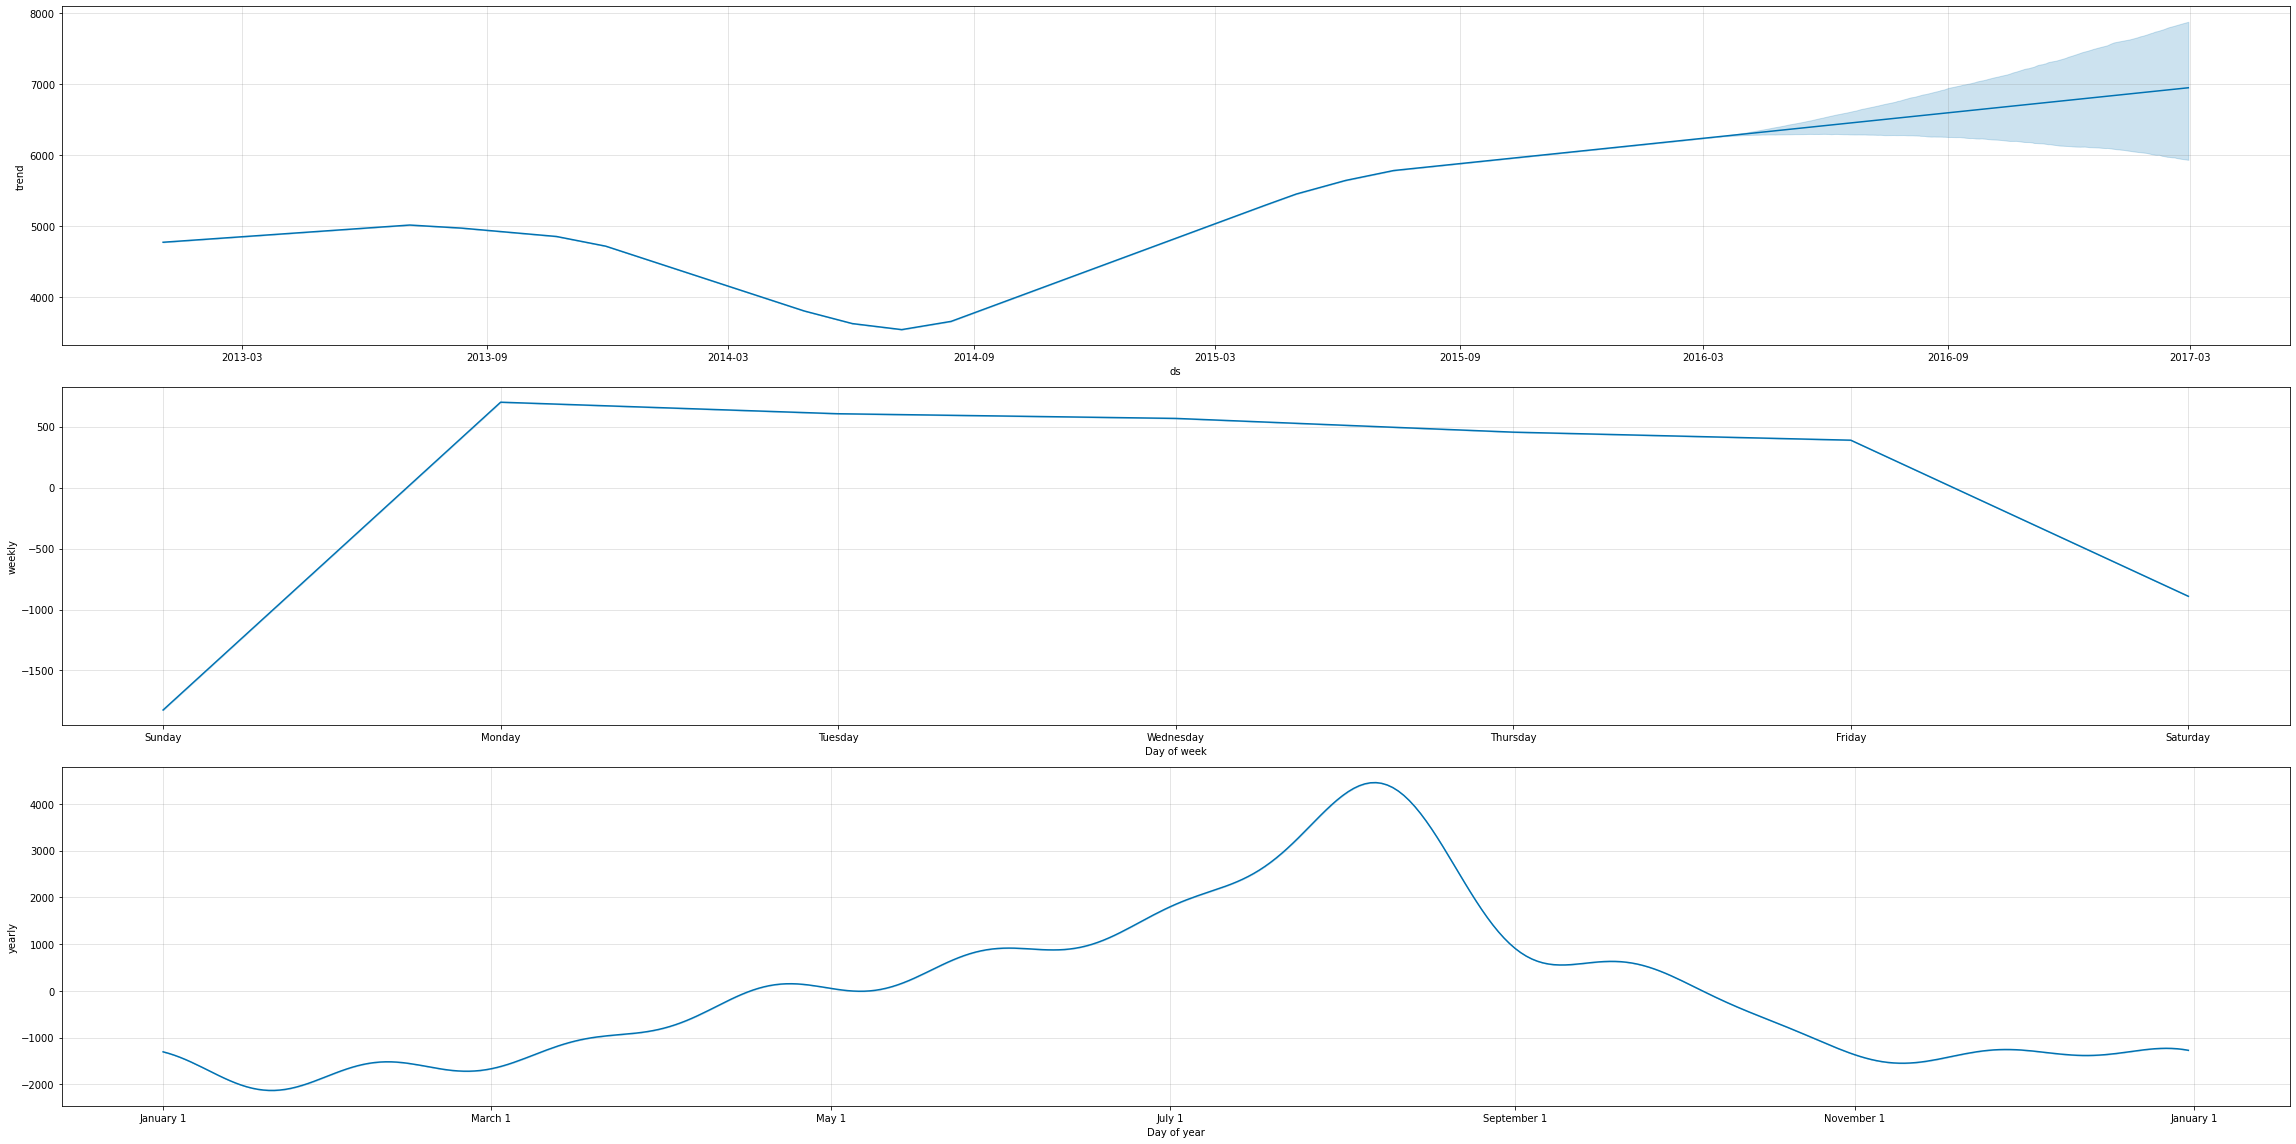

In [17]:
fig2 = model.plot_components(forecast, figsize=(32, 16))

## Validating results
- cross validation: 


In [25]:
len(df['calls'])-365

790

INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-03-01 00:00:00 and 2015-03-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

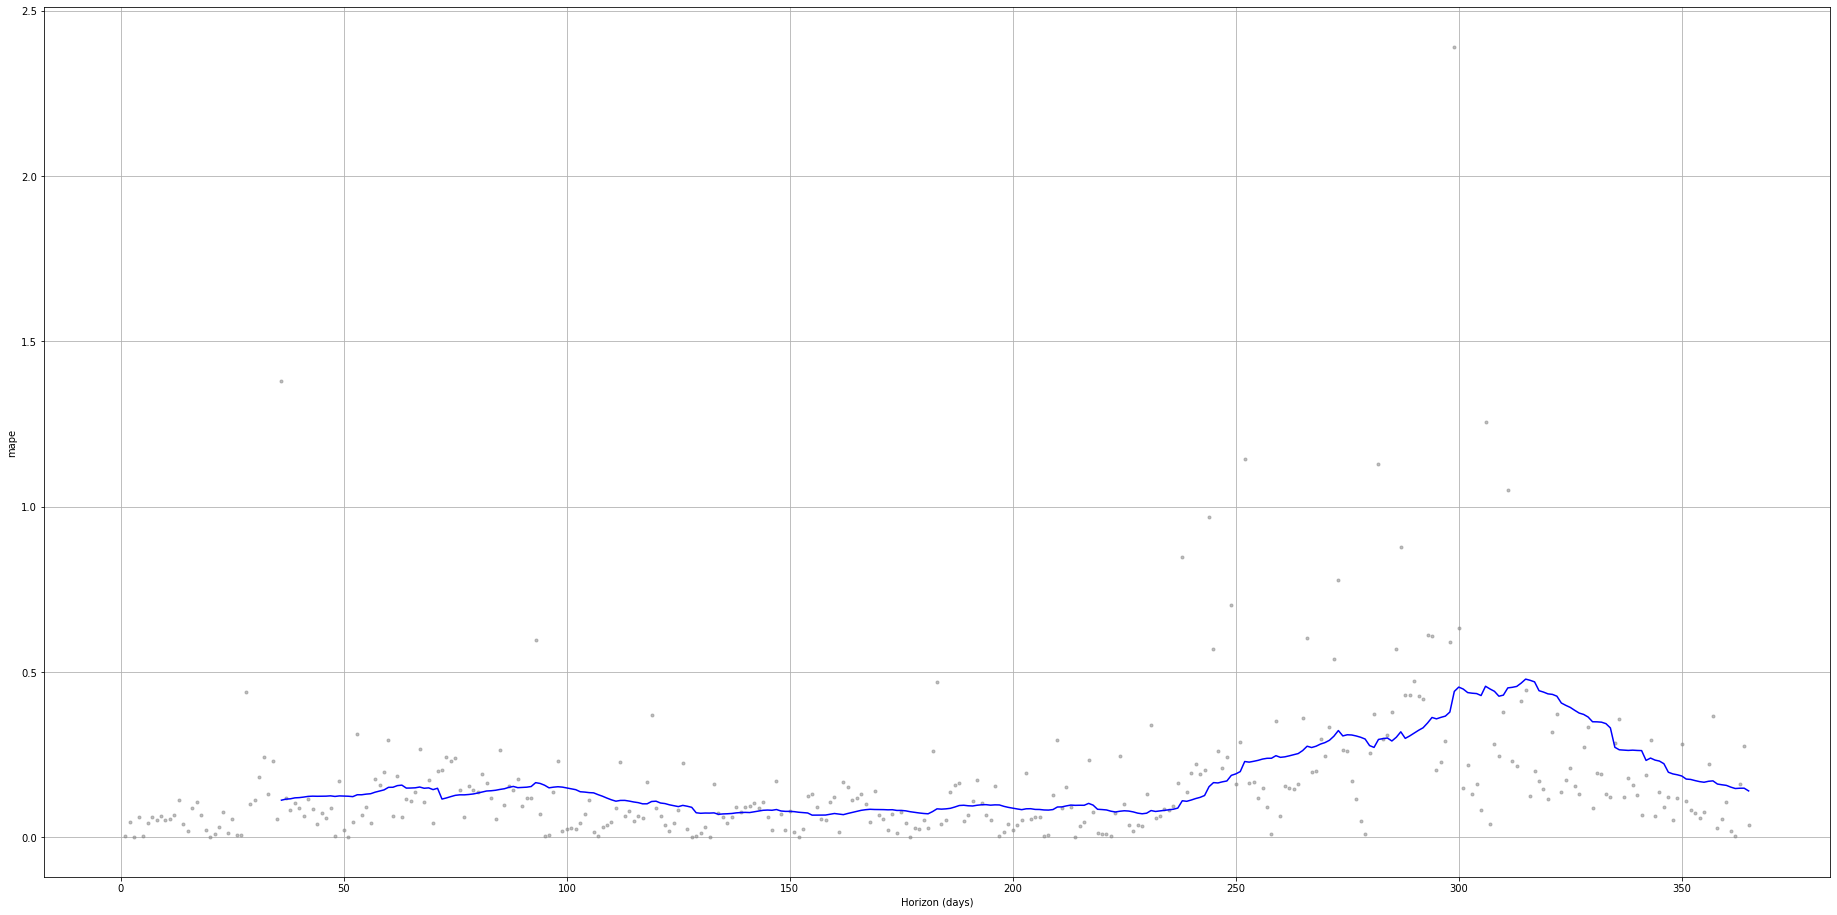

In [36]:
df_cv = cross_validation(model, initial='789 days', period='180 days', horizon='365 days')
fig3 = plot_cross_validation_metric(df_cv, metric='mape', figsize=(32, 16))

In [50]:
from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.mean()

horizon     200 days 12:00:00
mse                1.0488e+06
rmse                  970.022
mae                   803.539
mape                 0.176174
mdape                0.131699
coverage             0.685774
dtype: object